In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
x = dataset.iloc[:, [2, 3]].values # X es la variable independiente corresponde a edad y salario
y = dataset.iloc[:,4].values # Y es la variable dependiente y corresponde a la columna de compro o no compro

In [3]:
# Edad y salario
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [4]:
# Las categorías
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [5]:
# Dividir los datos en entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
# 25 % de los datos de entrada se usaran para la prueba
# 75 % de los datos de entrada se usaran para entrenar al algoritmo
# El argumento random_state=0 no cambie los datos cada vez que se ejecute

In [6]:
# Escalación de datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Solo escalamos la variable independiente X, ya que la columna Y está en 0-1
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [7]:
# Creamos el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
clasificator = LogisticRegression(random_state=0)
clasificator.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [8]:
# Usamos los datos de prueba
y_pred = clasificator.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 8, 24]], dtype=int64)

Confusión matrizm observamos dos clases 0/1
Hay 63 registros que debían ser clase 0 y los predijo correctamente
pero hay 5 registros que deberían de ser clase 0 y los predijo como 1 es son incorrectos

Hay 24 registros que deberían de ser clase 1 y los predijo correctamente

Hay 8 registros que deberían de ser clase 1 y los predijo como clase 0 es decir sin incorrectos

clase 0 = personas que no compraron

clase 1 = personas que sí compraron

In [11]:
score = clasificator.score(x_test, y_test)
score

0.87

El valor resultante indica el porcentaje de precisión del modelo

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set= x_test, y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01))
plt.contourf(X1,X2, clasificator.predict(np.array([X1.ravel(),X2.ravel()]).T). (X1.shape),
            alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j , 1],
    c=ListedColormap(('red','green'))(i), label=j)
plt.title("Regresion Logistica (Conjunto de prueba)")
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

SyntaxError: invalid syntax (3076338786.py, line 5)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clasificador2 = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [15]:
# Crear el modelo utilizando la libreria de arboles de decision
clasificador2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
# Estamos haciendo la predicción
y_pred_tree = clasificador2.predict(x_test)

In [17]:
cm2 = confusion_matrix(y_test, y_pred_tree)

In [18]:
cm2

array([[61,  7],
       [ 3, 29]], dtype=int64)

In [21]:
score2 = clasificador2.score(x_test, y_test)

In [22]:
score2

0.9

El porcentaje resultante de precision para el árbol de decisión, fue del 90%

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


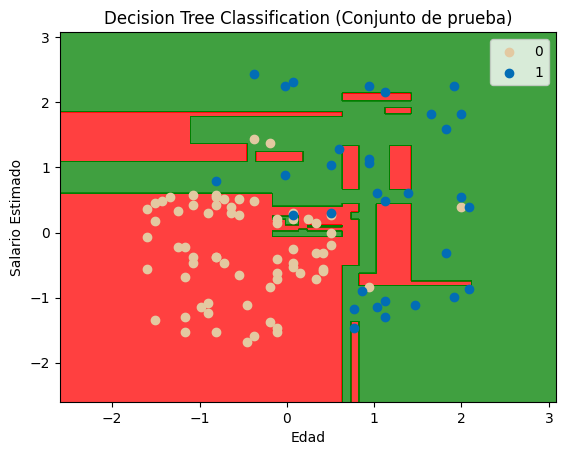

In [29]:
#Visualización de los resultados de prueba
from matplotlib.colors import ListedColormap
X_set, y_set= x_test, y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01),
                    np.arange(start=X_set[:,0].min() -1, stop = X_set[:,0].max()+1, step=0.01))
plt.contourf(X1,X2, clasificador2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j , 1],
    c=ListedColormap(('#e3c9a1','#026db5'))(i), label=j)
plt.title("Decision Tree Classification (Conjunto de prueba)")
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()